# Cleaning ZomatoData csv  and Exploratory Data Analysis

In [23]:
import pandas as pd
import numpy as np
import ast
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [24]:
# reading the data extracted after web scrapping 
df = pd.read_csv("../DataFiles/zomato_extracted_data_csv/zomato_extracted_data.csv",encoding = "ISO-8859-1",na_values=["NA",'-'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6147 entries, 0 to 6146
Data columns (total 23 columns):
restaurant_link           6147 non-null object
restaurant_ID             6147 non-null int64
restaurant_name           6147 non-null object
locality                  6147 non-null object
restaurant_category       6142 non-null object
zomato_gold               347 non-null object
discounts                 738 non-null object
photos_taken              6147 non-null int64
rating                    5328 non-null float64
votes                     5310 non-null float64
cuisines                  6147 non-null object
approx_cost_for_2         6147 non-null int64
opening_timings           6143 non-null object
address                   6041 non-null object
latitude                  5682 non-null float64
longitude                 5682 non-null float64
more_info                 6147 non-null object
featured_in               761 non-null object
known_for                 290 non-null object
mos

In [26]:
df.head(3)

,restaurant_link,restaurant_ID,restaurant_name,locality,restaurant_category,zomato_gold,discounts,photos_taken,rating,votes,...,address,latitude,longitude,more_info,featured_in,known_for,most_liked_Food,most_liked_Service,most_liked_Look & Feel,reviews
0,https://www.zomato.com/bangalore/abs-absolute-...,56618,AB's - Absolute Barbecues,Marathahalli,Casual Dining,zomato gold,NaN,4665,4.8,14700.0,...,"90/4, 3rd Floor, Outer Ring Road, Munnekollaly...",12.949798,77.699308,"['Wheelchair Accessible', 'Full Bar Available'...","['Great Buffets', ""Bengaluru's Finest""]",serving varieties of meat,"['5/5', 'Fish', 'Paan Ice Cream', 'Sea Food', ...","['4/5', 'Friendly Staff', 'Courteous Staff', '...","['4/5', 'Live Grill', 'Lovely Ambience', 'Decor']","(['2019-12-03 12:40:39', 'positive', 'NA', 'Go..."
1,https://www.zomato.com/bangalore/uru-brewpark-...,19122613,URU Brewpark,JP Nagar,Microbrewery,NaN,NaN,776,4.3,1421.0,...,"Maratt Estate, 4th Phase, Near Maratt Pimento,...",12.905891,77.601274,"['Home Delivery', 'Full Bar Available', 'Night...",['Sneak Peek Bengaluru'],NaN,"['4/5', 'Pizza', 'Nachos', 'Beer', 'Tiramisu',...","['4/5', 'Courteous Staff', 'Friendly Staff', '...","['4/5', 'Decor']","(['2020-01-08 18:17:08', 'positive', 'NA', 'Th..."
2,https://www.zomato.com/bangalore/the-big-barbe...,19203051,The Big Barbeque,Marathahalli,Casual Dining,NaN,NaN,609,4.7,1744.0,...,"88, 2nd Floor, Outer Ring Road, Near More Supe...",12.948399,77.698877,"['Full Bar Available', 'Free Parking', 'Live M...","['Sneak Peek Bengaluru', 'Corporate Favorites'...",NaN,NaN,NaN,NaN,"(['2020-01-17 08:23:30', 'NA', 'NA', ""Food : 5..."


In [27]:
df.shape

(6147, 23)

In [28]:
df = df.drop_duplicates("restaurant_ID",keep='first')

In [29]:
df.shape

(5637, 23)

In [30]:
def listToTuple(reviews):
    if isinstance(reviews,str):
        reviewList = ast.literal_eval(reviews)        
        if len(reviewList)>0 and isinstance(reviewList,list):
            tup = (reviewList[0],reviewList[1:])
            return tuple(tup)
    else:
        return np.nan


In [31]:
df["most_liked_Food"] = df["most_liked_Food"].apply(listToTuple)    
df["most_liked_Service"] = df["most_liked_Service"].apply(listToTuple)
df["most_liked_Look & Feel"] = df["most_liked_Look & Feel"].apply(listToTuple)

In [32]:
df["most_liked_Food"]

0       (5/5, [Fish, Paan Ice Cream, Sea Food, Crispy ...
1       (4/5, [Pizza, Nachos, Beer, Tiramisu, Chicken ...
2                                                     NaN
3       (5/5, [Cocktails, Mocktails, Pizza, Nachos, Cr...
4                                                     NaN
                              ...                        
6142                                                  NaN
6143                                                  NaN
6144                                                  NaN
6145                                                  NaN
6146                                                  NaN
Name: most_liked_Food, Length: 5637, dtype: object

In [33]:
def formatTime(timing):
    if isinstance(timing,str):
        if timing is np.nan or timing == "[]":
            return "NA"
        timings = ast.literal_eval(timing)
        newtime = ['12:00' if timed == '12noon' else '00:00' if timed == "12midnight" else timed if ("24" in timed) else datetime.strptime(timed,'%I%p').strftime('%H:%M') if len(timed)<5 else datetime.strptime(timed,'%I:%M%p').strftime('%H:%M') for timed in timings]
        return newtime

In [34]:
df["opening_timings"] = df["opening_timings"].apply(formatTime) #standardising timing format

In [35]:
df.head(3)

,restaurant_link,restaurant_ID,restaurant_name,locality,restaurant_category,zomato_gold,discounts,photos_taken,rating,votes,...,address,latitude,longitude,more_info,featured_in,known_for,most_liked_Food,most_liked_Service,most_liked_Look & Feel,reviews
0,https://www.zomato.com/bangalore/abs-absolute-...,56618,AB's - Absolute Barbecues,Marathahalli,Casual Dining,zomato gold,NaN,4665,4.8,14700.0,...,"90/4, 3rd Floor, Outer Ring Road, Munnekollaly...",12.949798,77.699308,"['Wheelchair Accessible', 'Full Bar Available'...","['Great Buffets', ""Bengaluru's Finest""]",serving varieties of meat,"(5/5, [Fish, Paan Ice Cream, Sea Food, Crispy ...","(4/5, [Friendly Staff, Courteous Staff, Courte...","(4/5, [Live Grill, Lovely Ambience, Decor])","(['2019-12-03 12:40:39', 'positive', 'NA', 'Go..."
1,https://www.zomato.com/bangalore/uru-brewpark-...,19122613,URU Brewpark,JP Nagar,Microbrewery,NaN,NaN,776,4.3,1421.0,...,"Maratt Estate, 4th Phase, Near Maratt Pimento,...",12.905891,77.601274,"['Home Delivery', 'Full Bar Available', 'Night...",['Sneak Peek Bengaluru'],NaN,"(4/5, [Pizza, Nachos, Beer, Tiramisu, Chicken ...","(4/5, [Courteous Staff, Friendly Staff, Friend...","(4/5, [Decor])","(['2020-01-08 18:17:08', 'positive', 'NA', 'Th..."
2,https://www.zomato.com/bangalore/the-big-barbe...,19203051,The Big Barbeque,Marathahalli,Casual Dining,NaN,NaN,609,4.7,1744.0,...,"88, 2nd Floor, Outer Ring Road, Near More Supe...",12.948399,77.698877,"['Full Bar Available', 'Free Parking', 'Live M...","['Sneak Peek Bengaluru', 'Corporate Favorites'...",NaN,NaN,NaN,NaN,"(['2020-01-17 08:23:30', 'NA', 'NA', ""Food : 5..."


In [36]:
cuisines_ = [x.split(",") if isinstance(x,str) else x for x in df["cuisines"]]
df['cuisines'] = [[elem.strip() for elem in x ]for x in cuisines_] #remove space

df['cuisines']

0            [European, Mediterranean, North Indian, BBQ]
1       [Continental, North Indian, Pizza, Asian, BBQ,...
2       [North Indian, Continental, Chinese, Pizza, Fa...
3       [Bar Food, Asian, Italian, North Indian, South...
4       [Chinese, North Indian, Fast Food, Finger Food...
                              ...                        
6142                                             [Bakery]
6143                                          [Beverages]
6144                              [North Indian, Chinese]
6145                [South Indian, Chinese, North Indian]
6146                         [South Indian, North Indian]
Name: cuisines, Length: 5637, dtype: object

In [37]:
#numeric conversion
df["zomato_gold"] = df["zomato_gold"].apply(lambda x: 1 if x == 'zomato gold' else 0)

In [38]:
#numeric conversion
df["discounts"] = df["discounts"].apply(lambda x: 1 if x is not np.nan else 0)

In [39]:
#writing the new clean data
df.to_csv("../DataFiles/zomato_clean_data_csv/zomato_clean_data"+".csv",index=False)

In [40]:
#shuffling df

from sklearn.utils import shuffle
df = shuffle(df)

In [41]:
df.index = df["restaurant_ID"]
df.drop(["restaurant_ID"],axis=1,inplace=True)

In [42]:
df.shape

(5637, 22)

In [43]:
df.head(3)

,restaurant_link,restaurant_name,locality,restaurant_category,zomato_gold,discounts,photos_taken,rating,votes,cuisines,...,address,latitude,longitude,more_info,featured_in,known_for,most_liked_Food,most_liked_Service,most_liked_Look & Feel,reviews
restaurant_ID,,,,,,,,,,,,,,,,,,,,,
18460030,https://www.zomato.com/bangalore/hyderabadi-ba...,Hyderabadi Bawarchi Multi Cuisine Restaurant,Hebbal,Casual Dining,0,0,11,2.8,104.0,"[Biryani, North Indian, Chinese]",...,"16, Tata Nagar Main Road, Next To BP Petrol Bu...",13.051346,77.574917,"['No Alcohol Available', 'Indoor Seating']",NaN,NaN,NaN,NaN,NaN,"(['2019-01-14 22:09:34', 'NA', 'NA', 'Ordered ..."
56635,https://www.zomato.com/bangalore/the-coastal-c...,The Coastal Crew by Fujian on 24th,JP Nagar,Casual Dining,1,0,646,4.2,1120.0,"[Chinese, Thai, Seafood, North Indian, Momos]",...,"25/1, Near Sampoorna, 24th Main, 5th Phase, JP...",12.903390,77.585709,"['Home Delivery', 'Full Bar Available', 'Live ...","['Pan-Asian Delicacies', 'Super Seafood']","wooden ambience with Fujian, Chinese and Thai ...","(5/5, [Noodle, Sea Food, Mocktails, Cocktails,...","(4/5, [Courteous Staff, Friendly Staff, Valet ...","(4/5, [Decor, Rooftop Ambience, Comfortable Se...","(['2019-12-05 17:49:13', 'positive', 'negative..."
19269353,https://www.zomato.com/bangalore/fatoor-reside...,Fatoor,Residency Road,Food Court,0,0,0,3.2,NaN,"[Arabian, BBQ, Rolls]",...,"Q Court, 3rd Floor, Garuda Mall, Magrath Road,...",12.970183,77.610104,"['Home Delivery', 'Outdoor Seating']",NaN,NaN,NaN,NaN,NaN,"(['2019-07-03 10:29:43', 'NA', 'NA', 'I ordere..."


# Some Interesting Insights#

<div class="span5 alert alert-info">
<b>    
1. Different Restaurant categories and their counts
</b>    
</div>

In [44]:
plt.style.use('ggplot')

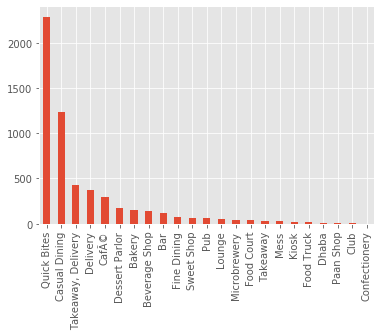

In [45]:
df["restaurant_category"].value_counts().plot.bar()

**Quick bites and Casual dining are the most common of all restaurant categories**

** **

<div class="span5 alert alert-info">
<b>
2. Most Unique cuisines
</b>    
</div>   

In [46]:
df['cuisines']

restaurant_ID
18460030                  [Biryani, North Indian, Chinese]
56635        [Chinese, Thai, Seafood, North Indian, Momos]
19269353                             [Arabian, BBQ, Rolls]
57664                                  [Beverages, Juices]
18802571                   [Burger, Cafe, American, Steak]
                                 ...                      
18529816                [Cafe, Burger, Italian, Fast Food]
19255652                           [North Indian, Seafood]
18869130                                          [Kerala]
18607717    [North Indian, South Indian, Chinese, Arabian]
50493            [Biryani, North Indian, Chinese, Mughlai]
Name: cuisines, Length: 5637, dtype: object

In [47]:
cuisines_series = df['cuisines'].apply(pd.Series).stack().reset_index(drop=True)

In [48]:
cuisines_series.value_counts(ascending = True)

Mongolian          1
Moroccan           1
Portuguese         1
Iranian            1
Bohri              1
                ... 
Biryani          795
Fast Food        896
South Indian    1131
Chinese         2041
North Indian    2635
Length: 97, dtype: int64

**Bohri, Belgian are some of rare cuisines whereas North Indian and Chinese dominates.**

** **

<div class="span5 alert alert-info">
<b>    
3. Which locality has maximum restaurants which are in featured in 'newly opened'?
</b>    
</div>     

In [49]:
dffeatured = df.dropna(subset=['featured_in'])

In [50]:
dffeatured['featured_in']

restaurant_ID
56635               ['Pan-Asian Delicacies', 'Super Seafood']
19157010             ['Sneak Peek Bengaluru', 'Insta-Worthy']
50512       ["Bengaluru's Finest", 'For The Family', 'Inst...
53872                                  ["Bengaluru's Finest"]
18613908             ['Corporate Favorites', 'Beer in a Bar']
                                  ...                        
19065156                               ["Bengaluru's Finest"]
18165774                                ['Comfort In A Cup!']
18531650                                ['Legendary Outlets']
54165                 ['Great Buffets', "Bengaluru's Finest"]
50493                                  ['Brilliant Biryanis']
Name: featured_in, Length: 739, dtype: object

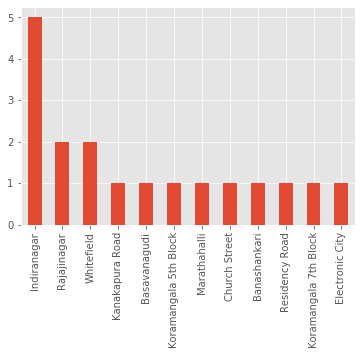

In [51]:
dffeatured["locality"][dffeatured['featured_in'].apply(lambda x: 'Newly Opened' in x)].value_counts().plot.bar()

**Indiranagar has the most restaurants featured under 'newly opened'.**  

** **  

<div class="span5 alert alert-info">
<b>    
4. Average cost of 2 for a restaurant category
</b>    
</div>     

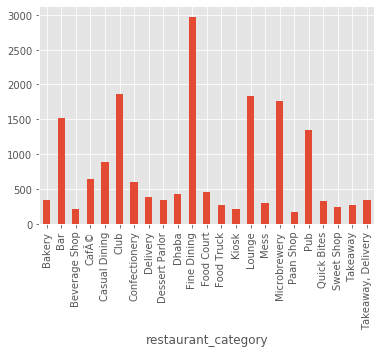

In [52]:
df.groupby("restaurant_category")['approx_cost_for_2'].mean().plot.bar()

**Fine dining category has the highest cost for 2 people.**

** **

<div class="span5 alert alert-info">
<b>    
5. Average restaurant rating in locality
</b>    
</div>     

In [53]:
df['rating'] = df['rating'].astype(float)

In [54]:
dfmeanratings = df.groupby("locality")['rating'].mean()
dfmeanratings.sort_values(ascending=False)

locality
Sankey Road              4.225000
Lavelle Road             4.143333
Church Street            4.095833
Race Course Road         4.084211
Koramangala 5th Block    4.061290
                           ...   
CV Raman Nagar           3.526087
Ejipura                  3.520000
Uttarahalli              3.515385
Bommanahalli             3.500000
City Market              3.476923
Name: rating, Length: 96, dtype: float64

**Sankey Road, Lavelle road, Church Street are some of the localities having highest ratings.** 

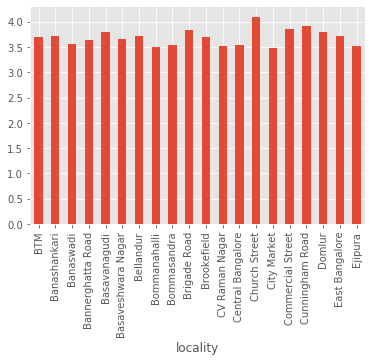

In [55]:
#Plotting avg rating of first 20 localities
dfmeanratingsTop20 = dfmeanratings[0:20]
dfmeanratingsTop20.plot.bar()

**Looking at the plot we can say the average ratings of the restaurants vary based on the locality they are in, which indicates the correlation between them.** 

** **

<div class="span5 alert alert-info">
<b>    
6. Restaurant categories having highest and lowest ratings
</b>    
</div>    

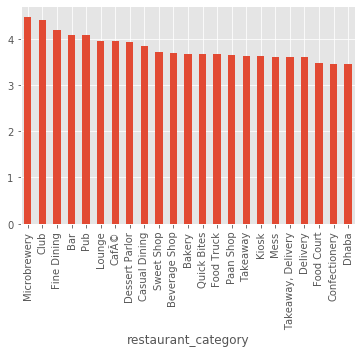

In [56]:
dfcatratings = df.groupby("restaurant_category")['rating'].mean()
dfcatratings.sort_values(ascending=False).plot.bar()

**Microbrewery and Club have the highest average rating while dhaba category has the lowest.** 

** **

<div class="span5 alert alert-info">
<b>    
7. To summarise,what is liked the most in top 2 restaurant categories.(Club, Microbreweries)
</b>    
</div>    

In [57]:
def combineFeatureText(series):
    text = []
    for i,row in series.iteritems():
        if type(row) is tuple:
            for k in row[1]:
                text.append(k)
                
    return text 

In [58]:
topCategories = ['Club','Microbrewery']
dfLikedInTopCat = df[df['restaurant_category'].isin(topCategories)]

In [59]:
dfLikedInTopCat = dfLikedInTopCat.dropna(subset=['most_liked_Food'])
mostLikedFoodText = dfLikedInTopCat.groupby(['restaurant_category'])['most_liked_Food'].agg(combineFeatureText)
mostLikedFoodText

restaurant_category
Club            [Cocktails, Pizza, Chicken Bbq Wings, Salad, P...
Microbrewery    [Beer, Cocktails, Hefeweizen, Nachos, Malai Ti...
Name: most_liked_Food, dtype: object

In [60]:
dfLikedInTopCat = dfLikedInTopCat.dropna(subset=['most_liked_Service'])
mostLikedServiceText = dfLikedInTopCat.groupby('restaurant_category')['most_liked_Service'].agg(combineFeatureText)
mostLikedServiceText

restaurant_category
Club            [Courteous Staff, Friendly Staff, Prompt Servi...
Microbrewery    [Courteous Staff, Courteous Service, Attentive...
Name: most_liked_Service, dtype: object

In [61]:
dfLikedInTopCat = dfLikedInTopCat.dropna(subset=['most_liked_Look & Feel'])
mostLikedLooknFeelText = dfLikedInTopCat.groupby('restaurant_category')['most_liked_Look & Feel'].agg(combineFeatureText)
mostLikedLooknFeelText

restaurant_category
Club             [Dj, Dance Floor, Decor, Dj, Dance Floor, Decor]
Microbrewery    [Classy Place, Lovely Ambience, Classy Ambienc...
Name: most_liked_Look & Feel, dtype: object

In [62]:
mostLikedCombined = mostLikedFoodText + mostLikedServiceText + mostLikedLooknFeelText

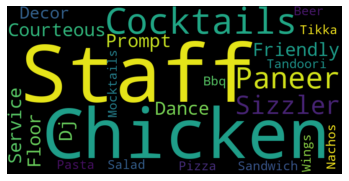

Cocktails Pizza Chicken Bbq Wings Salad Pasta Paneer Tikka Sandwich Cocktails Tandoori Chicken Beer Paneer Sizzler Chicken Sizzler Mocktails Nachos Courteous Staff Friendly Staff Prompt Service Courteous Staff Friendly Staff Prompt Service Dj Dance Floor Decor Dj Dance Floor Decor


In [63]:
liked_text = ' '.join(review for review in mostLikedCombined["Club"])

wordcloud = WordCloud(width=800, height=400,collocations=False).generate(liked_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print(liked_text)

**In 'Club' restaurant category Chicken, Cocktails, Paneer are the most liked items/words in food.
Also Staff, friendly, Service have significant importance.** 

** **

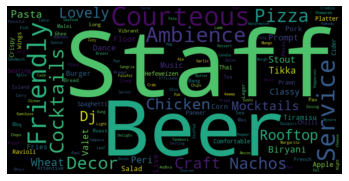

In [64]:
liked_text = ' '.join(review for review in mostLikedCombined["Microbrewery"])

wordcloud = WordCloud(width=800, height=400,collocations=False).generate(liked_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


**In 'Microbrewery' restaurant category Staff, Friendly, Service, Courteous, Decor are most liked/important words. Beer, Cocktails, Pizza are important in food/drinks.** 

** **

<div class="span5 alert alert-info">
<b> 
8. Exploring most liked food,service,look and feel in a most common restaurant category of a high rated restaurants.
</b>    
</div>    

In [65]:
topCategories = ['Quick bites','Casual Dining',]
dfLikedInTopCat1 = df[df['restaurant_category'].isin(topCategories)]

dfLikedInTopCat = dfLikedInTopCat1[dfLikedInTopCat1['rating'] >= 4.2]

dfLikedInTopCat = dfLikedInTopCat.dropna(subset=['most_liked_Food'])

mostLikedFoodText = dfLikedInTopCat.groupby(['restaurant_category'])['most_liked_Food'].agg(combineFeatureText)

cuisines_series = mostLikedFoodText.apply(pd.Series).stack().reset_index(drop=True)
cuisines_series.value_counts(ascending = False)

Mocktails              67
Cocktails              65
Pasta                  63
Pizza                  52
Fish                   52
                       ..
Schezwan Fried Rice     1
Saag                    1
Penne Alfredo           1
Fries                   1
Mushroom Toast          1
Length: 543, dtype: int64

**Mocktails, Cocktails, Pasta, Pizza are some of the most liked food items in the most common categories(Quick bites,Casual Dining) which are highly rated(>4.2).** 

** **

In [66]:
topCategories = ['Quick bites','Casual Dining']
dfLikedInTopCat2 = df[df['restaurant_category'].isin(topCategories)]

dfLikedInTopCat = dfLikedInTopCat2[dfLikedInTopCat2['rating'] >= 4.2]

dfLikedInTopCat = dfLikedInTopCat.dropna(subset=['most_liked_Service'])

mostLikedServicedText = dfLikedInTopCat.groupby(['restaurant_category'])['most_liked_Service'].agg(combineFeatureText)

service_series = mostLikedServicedText.apply(pd.Series).stack().reset_index(drop=True)
service_series.value_counts(ascending = False)

Friendly Staff       225
Courteous Staff      203
Prompt Service        86
Friendly Service      37
Courteous Service     36
Valet Service         29
Attentive Service      5
Cordial Staff          4
Efficient Service      3
Weekend Brunch         1
dtype: int64

**Friendly staff, Courteous staff are some of the most liked service in the most common categories(Quick bites,Casual Dining) which are highly rated(>4.2).** 

** **

In [67]:
topCategories = ['Quick bites','Casual Dining',]
dfLikedInTopCat3 = df[df['restaurant_category'].isin(topCategories)]

dfLikedInTopCat = dfLikedInTopCat3[dfLikedInTopCat3['rating'] >= 4.2]

dfLikedInTopCat = dfLikedInTopCat.dropna(subset=['most_liked_Look & Feel'])

mostLikedlookFeelText = dfLikedInTopCat.groupby(['restaurant_category'])['most_liked_Look & Feel'].agg(combineFeatureText)

service_series = mostLikedlookFeelText.apply(pd.Series).stack().reset_index(drop=True)
service_series.value_counts(ascending = False)

Decor                   202
Lovely Ambience          34
Rooftop Ambience         27
Live Music               26
Comfortable Seating      25
Cozy Place               20
Calm                     16
Cozy Ambience            16
Dj                       13
Live Grill               12
Rooftop Setting          11
Romantic Dinner           9
Cozy                      8
Peaceful Ambience         6
Classy Ambience           6
Classy Place              5
Pool Table                4
Dance Floor               3
Candle Light Dinner       3
Calm Ambience             3
Vibrant Ambience          3
Instrumental Music        2
Cute Ambience             2
Wooden Decor              2
Soothing Ambience         2
Live Cooking              2
Comfortable Sofas         2
Outdoor Ambience          2
Board Games               2
Dhaba Feel                2
Chinese Ambience          2
Village Theme             1
Live Grill Concept        1
Pirate Theme              1
Rooftop View              1
Punjabi Ambience    

**Decor, Lovely Ambience are some of the most liked LooknFeel features in the most common categories(Quick bites,Casual Dining) which are highly rated(>4.2).** 

** **

<div class="span5 alert alert-info">
<b>    
9. Insight on how Zomato Gold affects ratings of a particular restaurant category in any locality
</b>    
</div>    

In [68]:
dfZomato = df[df["zomato_gold"] == 1].groupby(['locality','restaurant_category'])['rating'].mean()
dfZomato

locality       restaurant_category
BTM            Bar                    3.600000
               Casual Dining          4.150000
               Dessert Parlor         4.400000
Banashankari   Casual Dining          3.700000
               Lounge                 3.900000
                                        ...   
Whitefield     Pub                    4.200000
Wilson Garden  Casual Dining          3.900000
Yelahanka      Casual Dining          4.033333
Yeshwantpur    Bar                    3.700000
               Casual Dining          3.833333
Name: rating, Length: 155, dtype: float64

In [69]:
dfNoZomato = df[df["zomato_gold"] == 0].groupby(['locality','restaurant_category'])['rating'].mean()
dfNoZomato

locality     restaurant_category
BTM          Bakery                 3.660000
             Beverage Shop          3.690909
             CafÃ©                  3.769231
             Casual Dining          3.784375
             Delivery               3.677778
                                      ...   
Yeshwantpur  Pub                    4.100000
             Quick Bites            3.621429
             Sweet Shop             3.450000
             Takeaway                    NaN
             Takeaway, Delivery     3.400000
Name: rating, Length: 791, dtype: float64

locality     restaurant_category
BTM          Bakery                 3.660000
             Beverage Shop          3.690909
             CafÃ©                  3.769231
             Casual Dining          3.784375
             Delivery               3.677778
                                      ...   
Yeshwantpur  Pub                    4.100000
             Quick Bites            3.621429
             Sweet Shop             3.450000
             Takeaway                    NaN
             Takeaway, Delivery     3.400000
Name: rating, Length: 791, dtype: float64

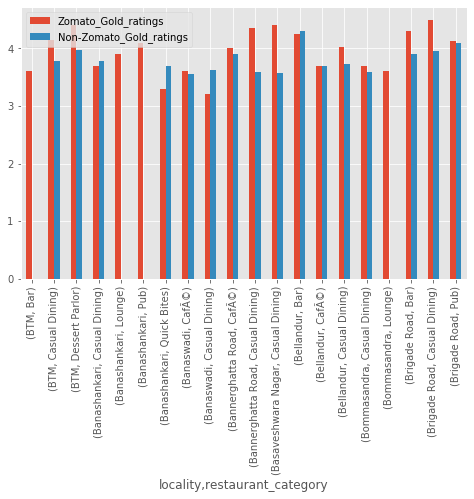

In [70]:
mergeddf = pd.merge(dfZomato,dfNoZomato,how ='left',on=['locality','restaurant_category'])
slicedMergeddf = mergeddf[0:20] #slice dataframe
ax = slicedMergeddf.plot.bar(figsize=(8,5))
ax.legend(["Zomato_Gold_ratings", "Non-Zomato_Gold_ratings"]);
dfNoZomato

**Considering a locality and restaurant category, most of the restaurants with zomato gold offers have better ratings on an average.**

** **

<div class="span5 alert alert-info">
<b>    
10. Insight on overall average rating of zomato and non zomato restaurants.
</b>    
</div>    

In [71]:
df[df["zomato_gold"] == 1]['rating'].mean()

4.107621951219512

In [72]:
df[df["zomato_gold"] == 0]['rating'].mean()

3.737020069808024

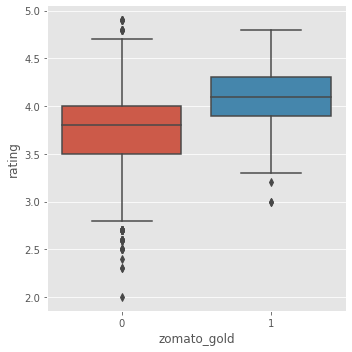

In [73]:
import seaborn as sns

sns.catplot(x="zomato_gold", y="rating", 
            kind="box", data=df);

**Overall Zomato gold restaurant have a higher average rating. We shall have a statistical inference on this later.**

<div class="span5 alert alert-info">
<b>    
11. Insight on overall average rating of discounted and non discounted restaurants.
</b>    
</div> 

In [74]:
df[df["discounts"] == 1]['rating'].mean()

3.7290640394088683

In [75]:
df[df["discounts"] == 0]['rating'].mean()

3.766395537996738

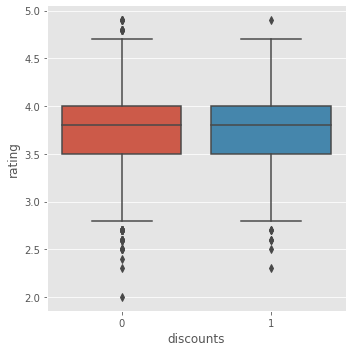

In [76]:
sns.catplot(x="discounts", y="rating", 
            kind="box", data=df);

**Overall average rating of a discounted restaurant nd non discounted retaurant is same. We shall have a statistical inference on this later.**

** **

<div class="span5 alert alert-info">
<b>    
12. Insight on Positive & negative sentiments on days of a week
</b>    
</div>    

In [77]:
df['reviews_new'] = df['reviews'].apply(ast.literal_eval)

In [78]:
review_series = df['reviews_new'].apply(pd.Series).stack().reset_index(drop=True)
review_series #each review has a date time,postive sentiment,negative sentiment,Text

0        [2019-01-14 22:09:34, NA, NA, Ordered for a de...
1        [2018-12-29 18:48:26, NA, NA, Worst experience...
2        [2018-12-07 22:21:22, NA, NA, Love their Biriy...
3        [2018-09-20 22:23:45, NA, NA, Worst delivery e...
4        [2018-09-10 23:41:36, NA, NA, This place is be...
                               ...                        
32930                [2019-11-02 13:33:24, positive, NA, ]
32931                [2019-10-28 13:47:57, positive, NA, ]
32932                [2019-10-26 11:13:49, positive, NA, ]
32933    [2019-10-22 16:59:35, NA, NA, Wow...just wow t...
32934    [2019-10-19 12:03:52, positive, NA, Hands down...
Length: 32935, dtype: object

In [79]:
p = [i[0:3] for i in review_series]

cols = ["ReviewDay","Positive sentiment","Negative sentiment"]
for i,obj in enumerate(p):
    obj[0] = datetime.strptime(obj[0], '%Y-%m-%d %H:%M:%S').strftime('%A') #date time to weekday


In [80]:
newDF = pd.DataFrame(p,columns=cols)
newDF.head()

,ReviewDay,Positive sentiment,Negative sentiment
0,Monday,NA,NA
1,Saturday,NA,NA
2,Friday,NA,NA
3,Thursday,NA,NA
4,Monday,NA,NA


In [81]:
s = newDF.set_index("ReviewDay").unstack().reset_index()
df3 = s.set_axis(['sentiment', 'ReviewDay','sentimentVal'], axis=1, inplace=False)

In [82]:
df3 = df3[df3.sentimentVal != 'NA']
df4 = df3.groupby(['ReviewDay','sentimentVal']).count()
df4.head()

sentiment
ReviewDay sentimentVal           
Friday    negative            532
          positive           1838
Monday    negative            480
          positive           1780
Saturday  negative            668

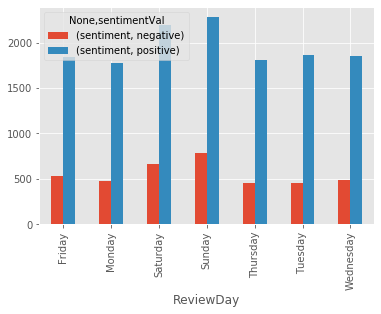

In [83]:
df4.unstack().plot(kind='bar')

**Overall there are more positive sentiments than negative,also weekends can relatively higher vote for sentiments.**

** **

<div class="span5 alert alert-info">
<b> 
Exploring correlations between variables.
</b>
</div>

Index(['restaurant_link', 'restaurant_name', 'locality', 'restaurant_category',
       'zomato_gold', 'discounts', 'photos_taken', 'rating', 'votes',
       'cuisines', 'approx_cost_for_2', 'opening_timings', 'address',
       'latitude', 'longitude', 'more_info', 'featured_in', 'known_for',
       'most_liked_Food', 'most_liked_Service', 'most_liked_Look & Feel',
       'reviews', 'reviews_new'],
      dtype='object')

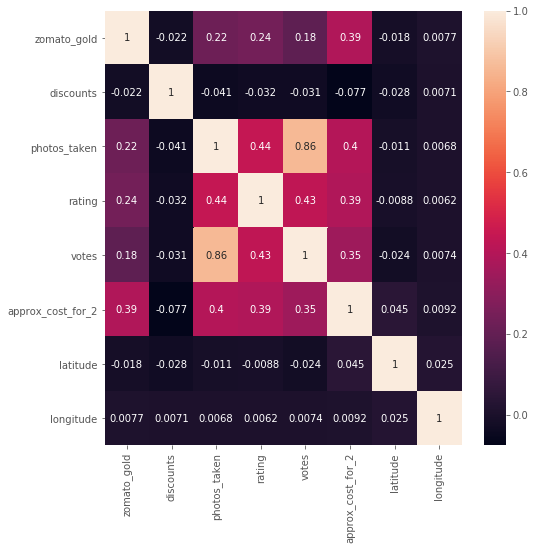

In [84]:
corr = df.corr(method='pearson')
plt.figure(figsize=(8,8))
ax = sns.heatmap(corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
df.columns

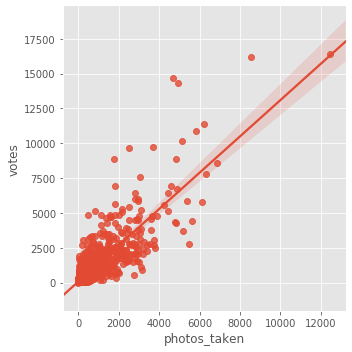

In [85]:
sns.lmplot('photos_taken','votes',data=df)

**Photos taken and votes have highest correlation.** 

<div class="span5 alert alert-info">
<b>
Converting features to numerical data for exploring more correlations and trends.
</b>
</div>    

In [86]:
#Creating a new copy of dataframe

dfm = df.copy()
dfm.head()

,restaurant_link,restaurant_name,locality,restaurant_category,zomato_gold,discounts,photos_taken,rating,votes,cuisines,...,latitude,longitude,more_info,featured_in,known_for,most_liked_Food,most_liked_Service,most_liked_Look & Feel,reviews,reviews_new
restaurant_ID,,,,,,,,,,,,,,,,,,,,,
18460030,https://www.zomato.com/bangalore/hyderabadi-ba...,Hyderabadi Bawarchi Multi Cuisine Restaurant,Hebbal,Casual Dining,0,0,11,2.8,104.0,"[Biryani, North Indian, Chinese]",...,13.051346,77.574917,"['No Alcohol Available', 'Indoor Seating']",NaN,NaN,NaN,NaN,NaN,"(['2019-01-14 22:09:34', 'NA', 'NA', 'Ordered ...","([2019-01-14 22:09:34, NA, NA, Ordered for a d..."
56635,https://www.zomato.com/bangalore/the-coastal-c...,The Coastal Crew by Fujian on 24th,JP Nagar,Casual Dining,1,0,646,4.2,1120.0,"[Chinese, Thai, Seafood, North Indian, Momos]",...,12.903390,77.585709,"['Home Delivery', 'Full Bar Available', 'Live ...","['Pan-Asian Delicacies', 'Super Seafood']","wooden ambience with Fujian, Chinese and Thai ...","(5/5, [Noodle, Sea Food, Mocktails, Cocktails,...","(4/5, [Courteous Staff, Friendly Staff, Valet ...","(4/5, [Decor, Rooftop Ambience, Comfortable Se...","(['2019-12-05 17:49:13', 'positive', 'negative...","([2019-12-05 17:49:13, positive, negative, Foo..."
19269353,https://www.zomato.com/bangalore/fatoor-reside...,Fatoor,Residency Road,Food Court,0,0,0,3.2,NaN,"[Arabian, BBQ, Rolls]",...,12.970183,77.610104,"['Home Delivery', 'Outdoor Seating']",NaN,NaN,NaN,NaN,NaN,"(['2019-07-03 10:29:43', 'NA', 'NA', 'I ordere...","([2019-07-03 10:29:43, NA, NA, I ordered Panee..."
57664,https://www.zomato.com/bangalore/sree-ganesh-f...,Sree Ganesh Fruit Juice Centre,Malleshwaram,Beverage Shop,0,0,10,3.8,28.0,"[Beverages, Juices]",...,13.001019,77.571928,"['Home Delivery', 'Seating Not Available', 'Ve...",NaN,NaN,NaN,NaN,NaN,"(['2020-01-17 19:11:09', 'positive', 'NA', '']...","([2020-01-17 19:11:09, positive, NA, ], [2019-..."
18802571,https://www.zomato.com/bangalore/smallys-resto...,Smally's Resto Cafe,HSR,CafÃ©,1,0,231,3.7,425.0,"[Burger, Cafe, American, Steak]",...,12.910151,77.651790,"['Home Delivery', 'Table booking recommended',...",NaN,NaN,"(4/5, [Burgers, Pasta, Hot Chocolate, Peri Per...","(4/5, [Friendly Staff, Prompt Service])","(4/5, [Decor, Cozy Place])","(['2019-11-28 14:46:45', 'NA', 'NA', ""Second o...","([2019-11-28 14:46:45, NA, NA, Second outlet o..."


In [777]:
#Adding some features

In [87]:
#encoding categorical variables

from sklearn import preprocessing

class Categorical_encoding:
    def __init__(self, df, categorical_features):
        self.df = df
        self.output_df = self.df.copy(deep=True)
        self.cat_features = categorical_features
        
        for c in self.cat_features:
            self.df.loc[:,c] = self.df.loc[:,c].astype(str).fillna(-1)
    
    def label_encoding(self):
        for c in self.cat_features:
            lbl = preprocessing.LabelEncoder()
            lbl.fit(self.df[c].values)
            self.output_df.loc[:,c] = lbl.transform(self.df[c].values)
        
        return self.output_df

In [88]:
# grouping restaurant categories and localities having low count to a 'other' category

dfm['restaurant_category'] = dfm['restaurant_category'].mask(dfm['restaurant_category'].map(dfm['restaurant_category'].value_counts()) < 20,'Others')
dfm['locality'] = dfm['locality'].mask(dfm['locality'].map(dfm['locality'].value_counts()) < 20,'Others')

In [89]:
# Label encoding Locality and restaurant category

cols = ['locality','restaurant_category']        
o_df = Categorical_encoding(dfm,cols)  
dfm = o_df.label_encoding()

In [90]:
dfm["featured_in_count"] = dfm["featured_in"].apply(lambda x: len(ast.literal_eval(x)) if x is not np.nan else x)
dfm["featured_in_count"]

restaurant_ID
18460030    NaN
56635       2.0
19269353    NaN
57664       NaN
18802571    NaN
           ... 
18529816    NaN
19255652    NaN
18869130    NaN
18607717    NaN
50493       1.0
Name: featured_in_count, Length: 5637, dtype: float64

In [91]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

def LabelBinarizerEncoding(categoricalList,colSubset = []):
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(categoricalList),columns = mlb.classes_,index = categoricalList.index)
    return res


In [92]:
dfm["most_liked_Food"]

restaurant_ID
18460030                                                  NaN
56635       (5/5, [Noodle, Sea Food, Mocktails, Cocktails,...
19269353                                                  NaN
57664                                                     NaN
18802571    (4/5, [Burgers, Pasta, Hot Chocolate, Peri Per...
                                  ...                        
18529816    (3/5, [Pasta, Burgers, Fries, Bbq Chicken Pizz...
19255652                                                  NaN
18869130                                                  NaN
18607717                                                  NaN
50493       (4/5, [Hyderabadi Biryani, Chicken Biryani, Ha...
Name: most_liked_Food, Length: 5637, dtype: object

In [93]:
#Referring above analysis we have top categories

famousCuisines = ['Chinese','North Indian','South Indian','Fast Food']
famousMostLikedFood = ['Cocktails','Mocktails','Pizza','Pasta']
famousService = ['Friendly Staff','Courteous Staff']
famousLookFeel = ['Decor']

dfcuisinesbin = LabelBinarizerEncoding(dfm['cuisines'])
dfcuisinesbin_ = dfcuisinesbin[famousCuisines]

dfm["most_liked_Food"] = dfm["most_liked_Food"].apply(lambda x: x[1] if x is not np.nan else [])
dfostLikedFoodbin = LabelBinarizerEncoding(dfm['most_liked_Food'])
dfostLikedFoodbin_ = dfostLikedFoodbin[famousMostLikedFood]

dfm["most_liked_Service"] = dfm["most_liked_Service"].apply(lambda x: x[1] if x is not np.nan else [])
dfostLikedServicebin = LabelBinarizerEncoding(dfm['most_liked_Service'])
dfostLikedServicebin_ = dfostLikedServicebin[famousService]

dfm["most_liked_Look & Feel"] = dfm["most_liked_Look & Feel"].apply(lambda x: x[1] if x is not np.nan else [])
dfostLikedLookFeelbin = LabelBinarizerEncoding(dfm['most_liked_Look & Feel'])
dfostLikedLookFeelbin_ = dfostLikedLookFeelbin[famousLookFeel]


In [94]:
def addbinarisedCols(binariseddf,colsFilterList):
    for i in range(len(colsFilterList)):
        dfm[colsFilterList[i]] = binariseddf[colsFilterList[i]]

addbinarisedCols(dfcuisinesbin_,famousCuisines)
addbinarisedCols(dfostLikedFoodbin_,famousMostLikedFood)
addbinarisedCols(dfostLikedServicebin_,famousService)
addbinarisedCols(dfostLikedLookFeelbin_,famousLookFeel)

dfm.head(3)

,restaurant_link,restaurant_name,locality,restaurant_category,zomato_gold,discounts,photos_taken,rating,votes,cuisines,...,North Indian,South Indian,Fast Food,Cocktails,Mocktails,Pizza,Pasta,Friendly Staff,Courteous Staff,Decor
restaurant_ID,,,,,,,,,,,,,,,,,,,,,
18460030,https://www.zomato.com/bangalore/hyderabadi-ba...,Hyderabadi Bawarchi Multi Cuisine Restaurant,20,4,0,0,11,2.8,104.0,"[Biryani, North Indian, Chinese]",...,1,0,0,0,0,0,0,0,0,0
56635,https://www.zomato.com/bangalore/the-coastal-c...,The Coastal Crew by Fujian on 24th,24,4,1,0,646,4.2,1120.0,"[Chinese, Thai, Seafood, North Indian, Momos]",...,1,0,0,1,1,0,0,1,1,1
19269353,https://www.zomato.com/bangalore/fatoor-reside...,Fatoor,58,8,0,0,0,3.2,NaN,"[Arabian, BBQ, Rolls]",...,0,0,0,0,0,0,0,0,0,0


Index(['restaurant_link', 'restaurant_name', 'locality', 'restaurant_category',
       'zomato_gold', 'discounts', 'photos_taken', 'rating', 'votes',
       'cuisines', 'approx_cost_for_2', 'opening_timings', 'address',
       'latitude', 'longitude', 'more_info', 'featured_in', 'known_for',
       'most_liked_Food', 'most_liked_Service', 'most_liked_Look & Feel',
       'reviews', 'reviews_new', 'featured_in_count', 'Chinese',
       'North Indian', 'South Indian', 'Fast Food', 'Cocktails', 'Mocktails',
       'Pizza', 'Pasta', 'Friendly Staff', 'Courteous Staff', 'Decor'],
      dtype='object')

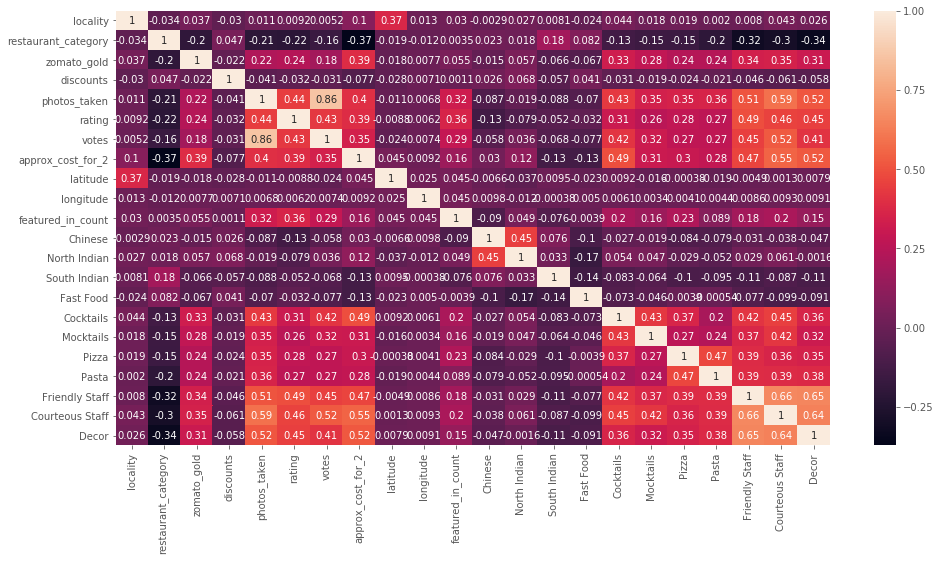

In [95]:
corr = dfm.corr(method='pearson')
plt.figure(figsize=(16,8))
ax = sns.heatmap(corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
dfm.columns

** **

/Users/Anand/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/Anand/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


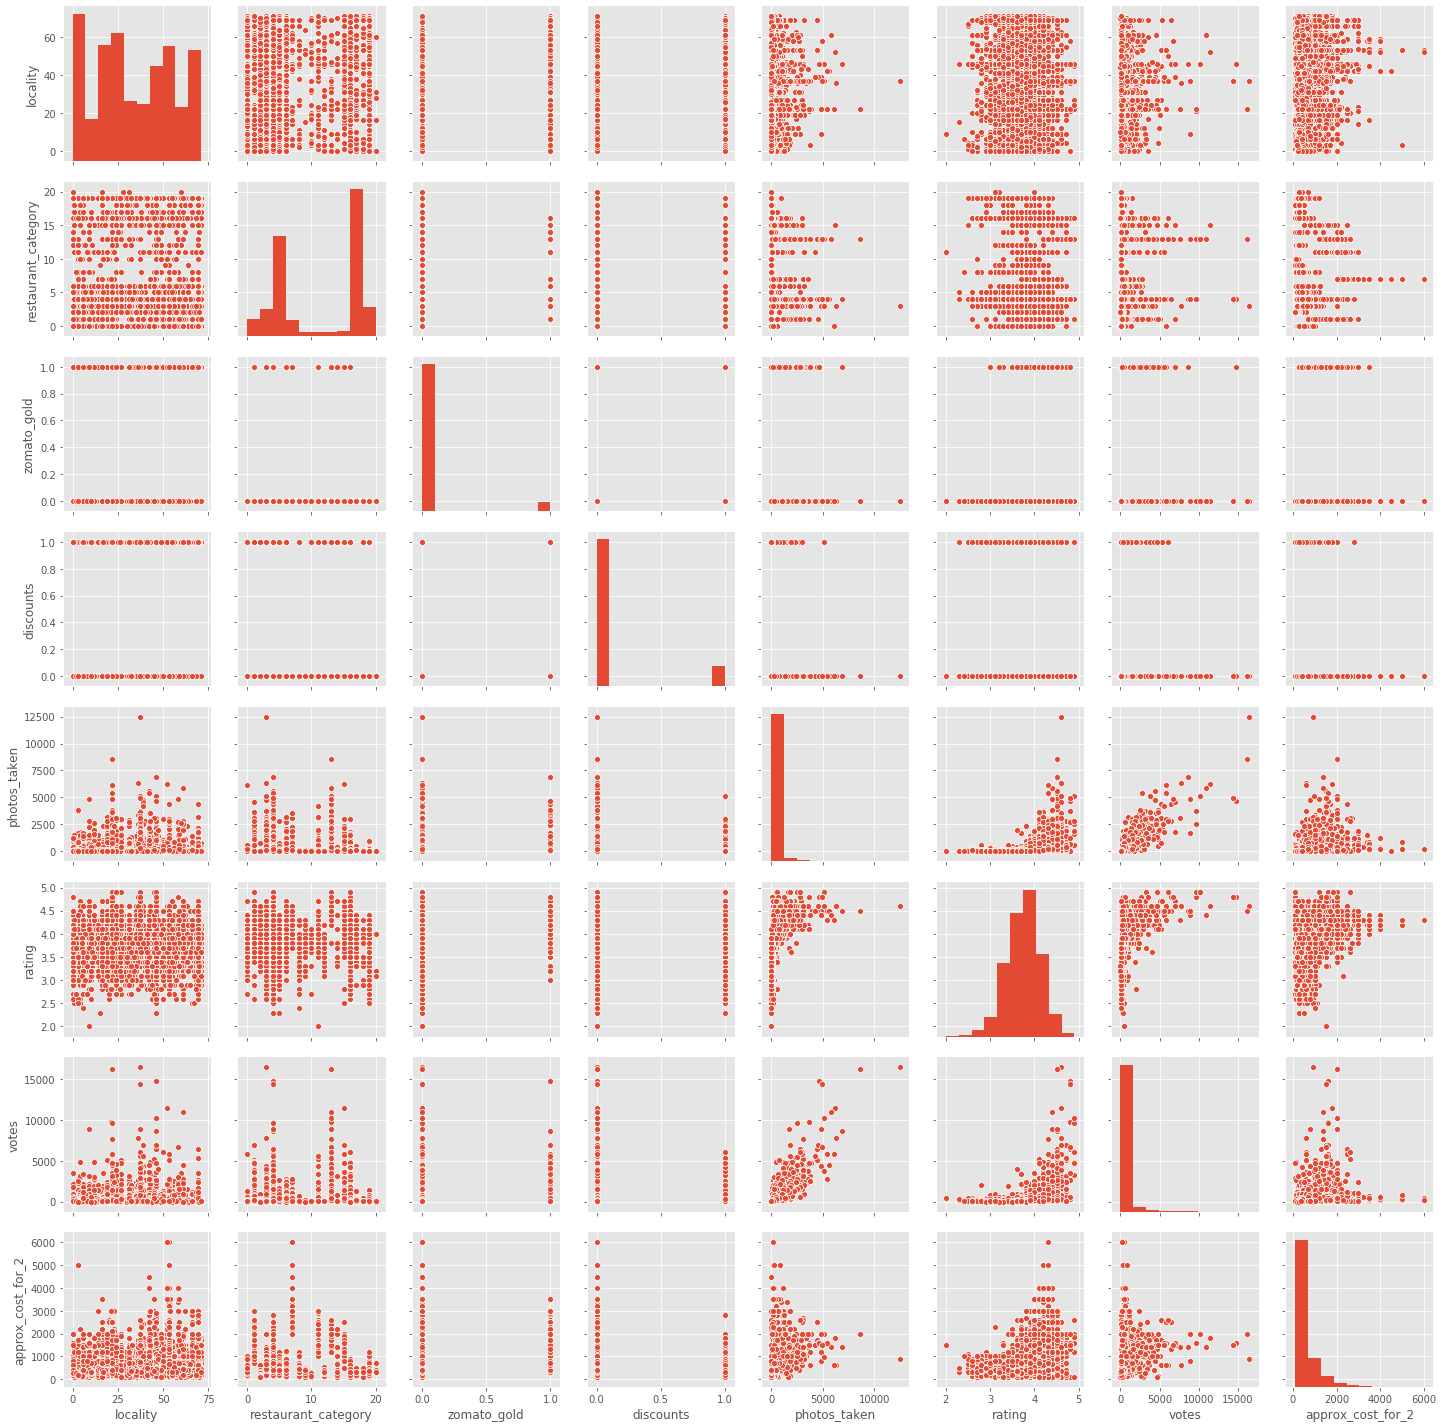

In [96]:
featureList = [ 'locality', 'restaurant_category',
       'zomato_gold', 'discounts', 'photos_taken', 'rating', 'votes',
       'cuisines', 'approx_cost_for_2', 'opening_timings', 
       'more_info', 'featured_in', 'known_for'
    ]
    
import seaborn as sns
sns.pairplot(dfm[featureList])


<div class="span5 alert alert-info">
<b>
Insights from pairplots:
</b>
</div>

**1. Very few localities have high approx_cost_for_2.**

**2. From the above restaurant_category distribution,we see that a very few categories are very popular.**

**3. Only few certain restaurant categories have high approx_cost_for_2.**

**4. From the distribution of zomato_gold, we see that relatively few restaurants have zomato_gold.**

**5. From the distribution of discounts, we see that relatively few restaurants have discounts.** 

**6. Photos_taken are positively correlated with ratings and votes,and negatively correlated with approx_cost_for_2.**

** **

In [98]:
#for further analysis
dfm.to_csv("../DataFiles/zomato_clean_data_csv/zomato_reduced_data"+".csv",index=False)

** **

<div class="span5 alert alert-info">
<b>
Consolidating the Insights:
</b>
</div>

<div class="span5 alert alert-info">
<b>
Insights from Descriptive Analysis:
</b>
</div>    

**1. Quick bites and Casual dining are the most common of all restaurant categories.**

**2. Singaporean, Indonesian are some of rare cuisines,whereas North Indian and Chinese are the most common.**

**3. Indiranagar has the most restaurants featured under 'newly opened'.**

**4. Fine dining category has the highest cost for 2 people.**

**5. The average ratings of the restaurants vary based on the locality they are in, which indicates the correlation between them.**

**6. Microbrewery and Club have the highest average rating while dhaba category has the lowest.** 

**7. Mocktails, cocktails, pasta, friendly staff, courteous staff ,decor, lovely ambience, rooftop ambience are some of the most liked things in most common restaurant categories.**

**8. Paneer, Chicken,Sizzler, Staff, Peri, Service, Pizza, Ambience,Beer are some of the most liked things in top rated restaurant categories.**

**9. Considering a locality and restaurant category,mostly zomato gold restaurants have better ratings.**

**10. Overall zomato gold restaurants have better average ratings.**

**11. Overall there are more positive sentiments than negative,also weekends can relatively higher vote for sentiments.**


<div class="span5 alert alert-info">
<b>
Insights from correlations plots:
</b>
</div>    

**1. Photos_taken are positively correlated with ratings and votes,and negatively correlated with approx_cost_for_2.**

**2. Features like photos_taken, votes, approx_cost_for_2, featured_in_count, zomato_gold tend to have positive correlation with restaurant rating.**

**3. Discounts have a negative correlation with ratings.**  

**4. Very few localities have high approx_cost_for_2.**

**5. From the above restaurant_category distribution,we see that a very few categories are very popular.**

**6. Only few certain restaurant categories have high approx_cost_for_2.**

**7. From the distribution of zomato_gold, we see that relatively few restaurants have zomato_gold.**

**8. From the distribution of discounts, we see that relatively few restaurants have discounts.** 


For further statistical inference

https://github.com/Anandpatil412/DSC/blob/master/CapstoneProject1/Zomato/Statistical_Inference.ipynb